# Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
#from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from allennlp_models.pretrained import load_predictor
predictor1 = load_predictor("roberta-sst")   #for sentiment analysis
#predictor = load_predictor("coref-spanbert") #for coreference resolution
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from nltk.corpus import stopwords
set(stopwords.words('english'))
from pd_replicator import replicator
from textacy.preprocessing.remove import remove_punctuation
from textacy.preprocessing.normalize import normalize_hyphenated_words

import allennlp_models.tagging

#coreference resolution
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2021.03.10.tar.gz")

#from allennlp_models.pretrained import load_predictor
#predictor = load_predictor("roberta-sst")

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp\tango\__init__.py:18: UserWarning: AllenNLP Tango is an experimental API and parts of it might change or disappear every time we release a new version.
  "AllenNLP Tango is an experimental API and parts of it might change or disappear "
2023-08-08 05:43:27,197 - INFO - allennlp.common.plugins - Plugin allennlp_models available
2023-08-08 05:43:27,212 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\coref-spanbert.json as plain json
2023-08-08 05:43:27,219 - INFO - allennlp.common.params - id = coref-spanbert
2023-08-08 05:43:27,223 - INFO - allennlp.common.params - type = coref-spanbert
2023-08-08 05:43:27,224 - INFO - allennlp.common.params - registered_model_name = coref
2023-08-08 05:43:27,227 - INFO - allennlp.common.params - type = coref
2023-08-08 05:43:27,228 - INFO - allennlp.comm

2023-08-08 05:43:27,494 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:27,501 - INFO - allennlp.common.params - evaluation_data.dataset.name = Ontonotes 5.0
2023-08-08 05:43:27,508 - INFO - allennlp.common.params - evaluation_data.dataset.url = https://catalog.ldc.upenn.edu/LDC2013T19
2023-08-08 05:43:27,515 - INFO - allennlp.common.params - evaluation_data.dataset.notes = The Coreference model was evaluated on the CoNLL 2012 dataset. Unfortunately we cannot release this data due to licensing restrictions by the LDC. To compile the data in the right format for evaluating the Coreference model, please see scripts/compile_coref_data.sh. This script requires the Ontonotes 5.0 dataset, available on the LDC website.
2023-08-08 05:43:27,522 - INFO - allennlp.common.params - evaluation_data.dataset.processed_url = /path/to/dataset
2023-08-08 05:43:27,527 - INFO - allennlp.common.params - evaluation_data.motivation = None
2023-08-08 05:43:27,529 - INFO - 

2023-08-08 05:43:27,740 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:27,742 - INFO - allennlp.common.params - model_details.paper.citation = 
@inproceedings{Chen2020MOCHAAD,
title={MOCHA: A Dataset for Training and Evaluating Generative Reading Comprehension Metrics},
author={Anthony Chen and Gabriel Stanovsky and S. Singh and Matt Gardner},
booktitle={EMNLP},
year={2020}}

2023-08-08 05:43:27,742 - INFO - allennlp.common.params - model_details.paper.title = MOCHA: A Dataset for Training and Evaluating Generative Reading Comprehension Metrics
2023-08-08 05:43:27,743 - INFO - allennlp.common.params - model_details.paper.url = https://api.semanticscholar.org/CorpusID:222208714
2023-08-08 05:43:27,745 - INFO - allennlp.common.params - model_details.license = None
2023-08-08 05:43:27,746 - INFO - allennlp.common.params - model_details.contact = allennlp-contact@allenai.org
2023-08-08 05:43:27,749 - INFO - allennlp.common.params - type = allennlp-contact

2023-08-08 05:43:28,001 - INFO - allennlp.common.params - model_usage.overrides = None
2023-08-08 05:43:28,003 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:28,007 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:28,010 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:28,012 - INFO - allennlp.common.params - model_details.description = The BART model here uses a language modeling head, and therefore can be used for generation. The BART encoder, implemented as a `Seq2SeqEncoder`, which assumes it operates on already embedded inputs.  This means that we remove the token and position embeddings from BART in this module.  For the typical use case of using BART to encode inputs to your model (where we include the token and position embeddings from BART), you should use `PretrainedTransformerEmbedder(bart_model_name, sub_module="encoder")` instead of this.
2023-08-08 05:43:28,015 - INFO - allennlp.common.para

2023-08-08 05:43:28,273 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:28,275 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:28,277 - INFO - allennlp.common.params - model_ethical_considerations.ethical_considerations = None
2023-08-08 05:43:28,278 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:28,281 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:28,285 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:28,288 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:28,291 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\glove-sst.json as plain json
2023-08-08 05:

2023-08-08 05:43:28,506 - INFO - allennlp.common.params - training_data.dataset.processed_url = https://allennlp.s3.amazonaws.com/datasets/sst/train.txt
2023-08-08 05:43:28,507 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:28,509 - INFO - allennlp.common.params - training_data.preprocessing = Binary classification setting
2023-08-08 05:43:28,510 - INFO - allennlp.common.params - type = Binary classification setting
2023-08-08 05:43:28,511 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:28,513 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:28,517 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:28,520 - INFO - allennlp.common.params - quantitative_analyses.unitary_results = Accuracy: 87% on SST test set.
2023-08-08 05:43:28,522 - INFO - allennlp.common.params - type = Accuracy: 87% on SST test set.
2023-08-08 05:43:28,530 - INFO - allennlp.comm

2023-08-08 05:43:28,737 - INFO - allennlp.common.params - metrics.model_performance_measures = Perplexity
2023-08-08 05:43:28,739 - INFO - allennlp.common.params - type = Perplexity
2023-08-08 05:43:28,741 - INFO - allennlp.common.params - metrics.decision_thresholds = None
2023-08-08 05:43:28,743 - INFO - allennlp.common.params - metrics.variation_approaches = None
2023-08-08 05:43:28,744 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:28,748 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:28,752 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:28,756 - INFO - allennlp.common.params - evaluation_data.dataset = BooksCorpus (800M words) and English Wikipedia (2,500M words).
2023-08-08 05:43:28,759 - INFO - allennlp.common.params - type = BooksCorpus (800M words) and English Wikipedia (2,500M words).
2023-08-08 05:43:28,772 - INFO - allennlp.common.params - type = BooksCorpus (800M words) and English

2023-08-08 05:43:29,018 - INFO - allennlp.common.params - model_details.short_description = OpenAI's GPT-2 language model that generates the next token.
2023-08-08 05:43:29,021 - INFO - allennlp.common.params - type = OpenAI's GPT-2 language model that generates the next token.
2023-08-08 05:43:29,038 - INFO - allennlp.common.params - model_details.developed_by = Radford et al
2023-08-08 05:43:29,042 - INFO - allennlp.common.params - type = Radford et al
2023-08-08 05:43:29,045 - INFO - allennlp.common.params - model_details.contributed_by = None
2023-08-08 05:43:29,048 - INFO - allennlp.common.params - model_details.date = 2020-06-30
2023-08-08 05:43:29,051 - INFO - allennlp.common.params - type = 2020-06-30
2023-08-08 05:43:29,054 - INFO - allennlp.common.params - model_details.version = 1
2023-08-08 05:43:29,056 - INFO - allennlp.common.params - type = 1
2023-08-08 05:43:29,060 - INFO - allennlp.common.params - model_details.model_type = GPT2
2023-08-08 05:43:29,063 - INFO - allennl

2023-08-08 05:43:29,397 - INFO - allennlp.common.params - type = transformer_mc
2023-08-08 05:43:29,400 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:29,405 - INFO - allennlp.common.params - registered_predictor_name = None
2023-08-08 05:43:29,412 - INFO - allennlp.common.params - display_name = RoBERTa Common Sense QA
2023-08-08 05:43:29,418 - INFO - allennlp.common.params - type = RoBERTa Common Sense QA
2023-08-08 05:43:29,424 - INFO - allennlp.common.params - task_id = mc
2023-08-08 05:43:29,431 - INFO - allennlp.common.params - type = mc
2023-08-08 05:43:29,439 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:29,445 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:29,448 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:29,452 - INFO - allennlp.common.params - model_usage.archive_file = commonsenseqa.2020-07-08.tar.gz
2023-08-08 05:43:29,455 - INFO - allennlp.common.params - type = co

2023-08-08 05:43:29,701 - INFO - allennlp.common.params - training_data.dataset.notes = Please download the data from the url provided.
2023-08-08 05:43:29,702 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:29,703 - INFO - allennlp.common.params - training_data.preprocessing = None
2023-08-08 05:43:29,706 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:29,709 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:29,713 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:29,716 - INFO - allennlp.common.params - quantitative_analyses.unitary_results = None
2023-08-08 05:43:29,717 - INFO - allennlp.common.params - quantitative_analyses.intersectional_results = None
2023-08-08 05:43:29,718 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:29,720 - INFO - allennlp.common.params - model_ethical_considerations.type = ref

2023-08-08 05:43:29,951 - INFO - allennlp.common.params - type = The chosen metric is accuracy, since it is a multiple choice model.
2023-08-08 05:43:29,959 - INFO - allennlp.common.params - metrics.decision_thresholds = None
2023-08-08 05:43:29,962 - INFO - allennlp.common.params - metrics.variation_approaches = None
2023-08-08 05:43:29,964 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:29,967 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:29,970 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:29,973 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:29,977 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:29,981 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:29,984 - INFO - allennlp.common.params - evaluation_data.dataset.name = PIQA (validation set)
2023-08-08 05:43:29,985 - INFO - al

2023-08-08 05:43:30,210 - INFO - allennlp.common.params - model_details.paper.title = RoBERTa: A Robustly Optimized BERT Pretraining Approach (Liu et al)
2023-08-08 05:43:30,212 - INFO - allennlp.common.params - model_details.paper.url = https://api.semanticscholar.org/CorpusID:198953378
2023-08-08 05:43:30,213 - INFO - allennlp.common.params - model_details.license = None
2023-08-08 05:43:30,215 - INFO - allennlp.common.params - model_details.contact = allennlp-contact@allenai.org
2023-08-08 05:43:30,217 - INFO - allennlp.common.params - type = allennlp-contact@allenai.org
2023-08-08 05:43:30,229 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:30,233 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:30,237 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:30,241 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:30,243 - INFO - allennlp.common.params - intended_use.primary_use

2023-08-08 05:43:30,637 - INFO - allennlp.common.params - type = This model uses a VilBERT-based backbone with an NLVR2-specific model head. The image features are obtained using the ResNet backbone and Faster RCNN (region detection).
2023-08-08 05:43:30,645 - INFO - allennlp.common.params - model_details.short_description = ViLBERT-based model for Visual Entailment.
2023-08-08 05:43:30,649 - INFO - allennlp.common.params - type = ViLBERT-based model for Visual Entailment.
2023-08-08 05:43:30,653 - INFO - allennlp.common.params - model_details.developed_by = Lu et al
2023-08-08 05:43:30,656 - INFO - allennlp.common.params - type = Lu et al
2023-08-08 05:43:30,658 - INFO - allennlp.common.params - model_details.contributed_by = Jacob Morrison
2023-08-08 05:43:30,660 - INFO - allennlp.common.params - type = Jacob Morrison
2023-08-08 05:43:30,662 - INFO - allennlp.common.params - model_details.date = 2021-05-27
2023-08-08 05:43:30,663 - INFO - allennlp.common.params - type = 2021-05-27
20

2023-08-08 05:43:30,877 - INFO - allennlp.common.params - id = nlvr2-vilbert
2023-08-08 05:43:30,879 - INFO - allennlp.common.params - type = nlvr2-vilbert
2023-08-08 05:43:30,882 - INFO - allennlp.common.params - registered_model_name = nlvr2
2023-08-08 05:43:30,884 - INFO - allennlp.common.params - type = nlvr2
2023-08-08 05:43:30,886 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:30,888 - INFO - allennlp.common.params - registered_predictor_name = None
2023-08-08 05:43:30,890 - INFO - allennlp.common.params - display_name = Visual Entailment - NLVR2
2023-08-08 05:43:30,892 - INFO - allennlp.common.params - type = Visual Entailment - NLVR2
2023-08-08 05:43:30,895 - INFO - allennlp.common.params - task_id = nlvr2
2023-08-08 05:43:30,897 - INFO - allennlp.common.params - type = nlvr2
2023-08-08 05:43:30,900 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:30,908 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:30,

2023-08-08 05:43:31,231 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:31,235 - INFO - allennlp.common.params - training_data.dataset.name = Natural Language for Visual Reasoning For Real train set
2023-08-08 05:43:31,238 - INFO - allennlp.common.params - training_data.dataset.url = https://github.com/lil-lab/nlvr/tree/master/nlvr2
2023-08-08 05:43:31,239 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:31,242 - INFO - allennlp.common.params - training_data.preprocessing = None
2023-08-08 05:43:31,245 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,250 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,252 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,255 - INFO - allennlp.common.params - quantitative_analyses.unitary_results = On the validation set:
F1: 33.7%
Accuracy: 50.8%.
These scores do not match

2023-08-08 05:43:31,441 - INFO - allennlp.common.params - model_details.paper.title = Mitigating Unwanted Biases with Adversarial Learning
2023-08-08 05:43:31,444 - INFO - allennlp.common.params - model_details.paper.url = https://api.semanticscholar.org/CorpusID:9424845
2023-08-08 05:43:31,445 - INFO - allennlp.common.params - model_details.license = None
2023-08-08 05:43:31,447 - INFO - allennlp.common.params - model_details.contact = allennlp-contact@allenai.org
2023-08-08 05:43:31,449 - INFO - allennlp.common.params - type = allennlp-contact@allenai.org
2023-08-08 05:43:31,456 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:31,460 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:31,464 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:31,467 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:31,469 - INFO - allennlp.common.params - intended_use.primary_users = None
2023-08

2023-08-08 05:43:31,676 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:31,679 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:31,683 - INFO - allennlp.common.params - model_usage.archive_file = binary-gender-bias-mitigated-snli-roberta.2021-05-20.tar.gz
2023-08-08 05:43:31,684 - INFO - allennlp.common.params - type = binary-gender-bias-mitigated-snli-roberta.2021-05-20.tar.gz
2023-08-08 05:43:31,695 - INFO - allennlp.common.params - model_usage.training_config = pair_classification/binary_gender_bias_mitigated_snli_roberta.jsonnet
2023-08-08 05:43:31,697 - INFO - allennlp.common.params - type = pair_classification/binary_gender_bias_mitigated_snli_roberta.jsonnet
2023-08-08 05:43:31,708 - INFO - allennlp.common.params - model_usage.install_instructions = pip install allennlp==2.5.0 allennlp-models==2.5.0
2023-08-08 05:43:31,711 - INFO - allennlp.common.params - type = pip install allennlp==2.5.0 allennlp-models==2.5.0
2023-08-08 05:4

2023-08-08 05:43:31,930 - INFO - allennlp.common.params - training_data.dataset.url = https://nlp.stanford.edu/projects/snli/
2023-08-08 05:43:31,933 - INFO - allennlp.common.params - training_data.dataset.processed_url = https://allennlp.s3.amazonaws.com/datasets/snli/snli_1.0_train.jsonl
2023-08-08 05:43:31,935 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:31,936 - INFO - allennlp.common.params - training_data.preprocessing = None
2023-08-08 05:43:31,937 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,941 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,945 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:31,950 - INFO - allennlp.common.params - quantitative_analyses.unitary_results = Net Neutral: 0.6417539715766907, Fraction Neutral: 0.7002295255661011, Threshold:0.5: 0.6902161836624146, Threshold:0.7: 0.49243637919425964
2023-08-08 05:

2023-08-08 05:43:32,147 - INFO - allennlp.common.params - type = Seq2Seq
2023-08-08 05:43:32,150 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:32,153 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:32,156 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:32,160 - INFO - allennlp.common.params - model_details.paper.citation = 
@article{Parikh2016ADA,
title={A Decomposable Attention Model for Natural Language Inference},
author={Ankur P. Parikh and Oscar T{"a}ckstr{"o}m and Dipanjan Das and Jakob Uszkoreit},
journal={ArXiv},
year={2016},
volume={abs/1606.01933}}

2023-08-08 05:43:32,163 - INFO - allennlp.common.params - model_details.paper.title = A Decomposable Attention Model for Natural Language Inference
2023-08-08 05:43:32,165 - INFO - allennlp.common.params - model_details.paper.url = https://api.semanticscholar.org/CorpusID:8495258
2023-08-08 05:43:32,167 - INFO - allennlp.common.

2023-08-08 05:43:32,585 - INFO - allennlp.common.params - type = pip install allennlp==1.0.0 allennlp-models==1.0.0
2023-08-08 05:43:32,594 - INFO - allennlp.common.params - model_usage.overrides = None
2023-08-08 05:43:32,596 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:32,601 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:32,603 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:32,605 - INFO - allennlp.common.params - model_details.description = This `Model` implements the ESIM model, which is a sequential neural inference model based on chain LSTMs.
2023-08-08 05:43:32,607 - INFO - allennlp.common.params - type = This `Model` implements the ESIM model, which is a sequential neural inference model based on chain LSTMs.
2023-08-08 05:43:32,615 - INFO - allennlp.common.params - model_details.short_description = Enhanced LSTM trained on SNLI.
2023-08-08 05:43:32,618 - INFO - allennlp.common.params - ty

2023-08-08 05:43:32,835 - INFO - allennlp.common.params - id = pair-classification-roberta-mnli
2023-08-08 05:43:32,837 - INFO - allennlp.common.params - type = pair-classification-roberta-mnli
2023-08-08 05:43:32,838 - INFO - allennlp.common.params - registered_model_name = basic_classifier
2023-08-08 05:43:32,840 - INFO - allennlp.common.params - type = basic_classifier
2023-08-08 05:43:32,841 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:32,843 - INFO - allennlp.common.params - registered_predictor_name = textual_entailment
2023-08-08 05:43:32,845 - INFO - allennlp.common.params - type = textual_entailment
2023-08-08 05:43:32,848 - INFO - allennlp.common.params - display_name = RoBERTa MNLI
2023-08-08 05:43:32,851 - INFO - allennlp.common.params - type = RoBERTa MNLI
2023-08-08 05:43:32,853 - INFO - allennlp.common.params - task_id = textual_entailment
2023-08-08 05:43:32,855 - INFO - allennlp.common.params - type = textual_entailment
2023-08-08 05:43:32,857 

2023-08-08 05:43:33,080 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:33,083 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:33,086 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:33,088 - INFO - allennlp.common.params - training_data.dataset.name = Multi-genre Natural Language Inference (MultiNLI) train set
2023-08-08 05:43:33,090 - INFO - allennlp.common.params - training_data.dataset.url = https://cims.nyu.edu/~sbowman/multinli/
2023-08-08 05:43:33,092 - INFO - allennlp.common.params - training_data.dataset.processed_url = https://allennlp.s3.amazonaws.com/datasets/multinli/multinli_1.0_train.jsonl
2023-08-08 05:43:33,094 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:33,096 - INFO - allennlp.common.params - training_data.preprocessing = None
2023-08-08 05:43:33,097 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08

2023-08-08 05:43:33,383 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:33,386 - INFO - allennlp.common.params - intended_use.primary_users = None
2023-08-08 05:43:33,390 - INFO - allennlp.common.params - intended_use.out_of_scope_use_cases = None
2023-08-08 05:43:33,393 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:33,398 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:33,402 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:33,406 - INFO - allennlp.common.params - factors.relevant_factors = None
2023-08-08 05:43:33,408 - INFO - allennlp.common.params - factors.evaluation_factors = None
2023-08-08 05:43:33,410 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:33,416 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:33,418 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:33,422 - INFO - allennlp.common.params - metrics.model_

2023-08-08 05:43:33,714 - INFO - allennlp.common.params - model_details.short_description = RoBERTa finetuned on SNLI.
2023-08-08 05:43:33,718 - INFO - allennlp.common.params - type = RoBERTa finetuned on SNLI.
2023-08-08 05:43:33,729 - INFO - allennlp.common.params - model_details.developed_by = Liu et al
2023-08-08 05:43:33,733 - INFO - allennlp.common.params - type = Liu et al
2023-08-08 05:43:33,735 - INFO - allennlp.common.params - model_details.contributed_by = Dirk Groeneveld
2023-08-08 05:43:33,737 - INFO - allennlp.common.params - type = Dirk Groeneveld
2023-08-08 05:43:33,741 - INFO - allennlp.common.params - model_details.date = 2020-07-29
2023-08-08 05:43:33,744 - INFO - allennlp.common.params - type = 2020-07-29
2023-08-08 05:43:33,746 - INFO - allennlp.common.params - model_details.version = 1
2023-08-08 05:43:33,748 - INFO - allennlp.common.params - type = 1
2023-08-08 05:43:33,750 - INFO - allennlp.common.params - model_details.model_type = RoBERTa
2023-08-08 05:43:33,7

2023-08-08 05:43:34,009 - INFO - allennlp.common.params - registered_model_name = bidaf
2023-08-08 05:43:34,012 - INFO - allennlp.common.params - type = bidaf
2023-08-08 05:43:34,013 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:34,016 - INFO - allennlp.common.params - registered_predictor_name = None
2023-08-08 05:43:34,018 - INFO - allennlp.common.params - display_name = ELMo-BiDAF
2023-08-08 05:43:34,020 - INFO - allennlp.common.params - type = ELMo-BiDAF
2023-08-08 05:43:34,023 - INFO - allennlp.common.params - task_id = rc
2023-08-08 05:43:34,026 - INFO - allennlp.common.params - type = rc
2023-08-08 05:43:34,029 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:34,033 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:34,036 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:34,039 - INFO - allennlp.common.params - model_usage.archive_file = bidaf-elmo.2021-02-11.tar.gz
2023-08-08 05:43:

2023-08-08 05:43:34,313 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:34,317 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:34,320 - INFO - allennlp.common.params - training_data.dataset.name = SQuAD training set
2023-08-08 05:43:34,323 - INFO - allennlp.common.params - training_data.dataset.url = https://rajpurkar.github.io/SQuAD-explorer/explore/1.1/dev/
2023-08-08 05:43:34,324 - INFO - allennlp.common.params - training_data.dataset.processed_url = https://s3-us-west-2.amazonaws.com/allennlp/datasets/squad/squad-train-v1.1.json
2023-08-08 05:43:34,325 - INFO - allennlp.common.params - training_data.motivation = None
2023-08-08 05:43:34,328 - INFO - allennlp.common.params - training_data.preprocessing = None
2023-08-08 05:43:34,332 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:34,336 - INFO - allennlp.common.params - quantitative_analyses.type = ref
2023-08-08 05:43:34,339 

2023-08-08 05:43:34,561 - INFO - allennlp.common.params - model_details.contact = allennlp-contact@allenai.org
2023-08-08 05:43:34,564 - INFO - allennlp.common.params - type = allennlp-contact@allenai.org
2023-08-08 05:43:34,577 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:34,579 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:34,584 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:34,588 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:34,591 - INFO - allennlp.common.params - intended_use.primary_users = None
2023-08-08 05:43:34,593 - INFO - allennlp.common.params - intended_use.out_of_scope_use_cases = None
2023-08-08 05:43:34,595 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:34,600 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:34,603 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:34,606 - INFO - a

2023-08-08 05:43:34,903 - INFO - allennlp.common.params - type = An augmented version of QANet model with some rudimentary numerical reasoning abilities. The main idea here is that instead of just predicting a passage span after doing all of the QANet modeling stuff, we add several different 'answer abilities': predicting a span from the question, predicting a count, or predicting an arithmetic expression.  Near the end of the QANet model, we have a variable that predicts what kind of answer type we need, and each branch has separate modeling logic to predict that answer type.  We then marginalize over all possible ways of getting to the right answer through each of these answer types.
2023-08-08 05:43:34,921 - INFO - allennlp.common.params - model_details.short_description = An augmented version of QANet that adds rudimentary numerical reasoning ability, trained on DROP (Dua et al., 2019), as published in the original DROP paper.
2023-08-08 05:43:34,925 - INFO - allennlp.common.params

2023-08-08 05:43:35,455 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:35,470 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:35,498 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\rc-nmn.json as plain json
2023-08-08 05:43:35,526 - INFO - allennlp.common.params - id = rc-nmn
2023-08-08 05:43:35,528 - INFO - allennlp.common.params - type = rc-nmn
2023-08-08 05:43:35,543 - INFO - allennlp.common.params - registered_model_name = None
2023-08-08 05:43:35,557 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:35,566 - INFO - allennlp.common.params - registered_predictor_name = None
2023-08-08 05:43:35,570 - INFO - allennlp.common.params - display_name = Neural Module Network (NMN)
2023-08-08 05:43:35,572 - INFO - allen

2023-08-08 05:43:35,855 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:35,857 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:35,861 - INFO - allennlp.common.params - model_ethical_considerations.ethical_considerations = None
2023-08-08 05:43:35,864 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:35,872 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:35,875 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:35,879 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:35,884 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\rc-transformer-qa.json as plain json
2023-0

2023-08-08 05:43:36,208 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:36,213 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:36,218 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:36,227 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:36,233 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:36,244 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:36,250 - INFO - allennlp.common.params - evaluation_data.dataset.name = SQuAD dev set
2023-08-08 05:43:36,256 - INFO - allennlp.common.params - evaluation_data.dataset.url = https://rajpurkar.github.io/SQuAD-explorer/explore/2.0/dev/
2023-08-08 05:43:36,259 - INFO - allennlp.common.params - evaluation_data.dataset.processed_url = https://s3-us-west-2.amazonaws.com/allennlp/datasets/squad/squad-dev-v2.0.json
2023-08-08 05:43:36,263 - INFO - allen

2023-08-08 05:43:36,561 - INFO - allennlp.common.params - type = RoBERTa-based binary classifier for Stanford Sentiment Treebank
2023-08-08 05:43:36,564 - INFO - allennlp.common.params - model_details.developed_by = Devlin et al
2023-08-08 05:43:36,566 - INFO - allennlp.common.params - type = Devlin et al
2023-08-08 05:43:36,568 - INFO - allennlp.common.params - model_details.contributed_by = Zhaofeng Wu
2023-08-08 05:43:36,570 - INFO - allennlp.common.params - type = Zhaofeng Wu
2023-08-08 05:43:36,573 - INFO - allennlp.common.params - model_details.date = 2020-06-08
2023-08-08 05:43:36,575 - INFO - allennlp.common.params - type = 2020-06-08
2023-08-08 05:43:36,579 - INFO - allennlp.common.params - model_details.version = 1
2023-08-08 05:43:36,582 - INFO - allennlp.common.params - type = 1
2023-08-08 05:43:36,584 - INFO - allennlp.common.params - model_details.model_type = RoBERTa large
2023-08-08 05:43:36,587 - INFO - allennlp.common.params - type = RoBERTa large
2023-08-08 05:43:36,

2023-08-08 05:43:36,862 - INFO - allennlp.common.params - display_name = NLVR Semantic Parsing
2023-08-08 05:43:36,865 - INFO - allennlp.common.params - type = NLVR Semantic Parsing
2023-08-08 05:43:36,869 - INFO - allennlp.common.params - task_id = semparse-nlvr
2023-08-08 05:43:36,871 - INFO - allennlp.common.params - type = semparse-nlvr
2023-08-08 05:43:36,872 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:36,876 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:36,882 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:36,886 - INFO - allennlp.common.params - model_usage.archive_file = https://allennlp.s3.amazonaws.com/models/nlvr-erm-model-2020.02.10-rule-vocabulary-updated.tar.gz
2023-08-08 05:43:36,889 - INFO - allennlp.common.params - type = https://allennlp.s3.amazonaws.com/models/nlvr-erm-model-2020.02.10-rule-vocabulary-updated.tar.gz
2023-08-08 05:43:36,909 - INFO - allennlp.common.params - model_usag

2023-08-08 05:43:37,183 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:37,186 - INFO - allennlp.common.params - model_ethical_considerations.ethical_considerations = None
2023-08-08 05:43:37,189 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:37,191 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:37,196 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:37,199 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:37,203 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\semparse-text-to-sql.json as plain json
2023-08-08 05:43:37,216 - INFO - allennlp.common.params - id = semparse-text-to-sql
2023-08-08 05:43:

2023-08-08 05:43:37,466 - INFO - allennlp.common.params - metrics.variation_approaches = None
2023-08-08 05:43:37,468 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:37,471 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:37,474 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:37,478 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:37,482 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:37,485 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:37,488 - INFO - allennlp.common.params - evaluation_data.dataset.name = ATIS
2023-08-08 05:43:37,490 - INFO - allennlp.common.params - evaluation_data.dataset.url = https://api.semanticscholar.org/CorpusID:1094063
2023-08-08 05:43:37,493 - INFO - allennlp.common.params - evaluation_data.dataset.notes = Please download the data from the url provided.
202

2023-08-08 05:43:37,772 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:37,775 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:37,779 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:37,781 - INFO - allennlp.common.params - intended_use.primary_users = None
2023-08-08 05:43:37,783 - INFO - allennlp.common.params - intended_use.out_of_scope_use_cases = None
2023-08-08 05:43:37,786 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:37,789 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:37,792 - INFO - allennlp.common.params - factors.type = ref
2023-08-08 05:43:37,796 - INFO - allennlp.common.params - factors.relevant_factors = None
2023-08-08 05:43:37,799 - INFO - allennlp.common.params - factors.evaluation_factors = None
2023-08-08 05:43:37,801 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:37,805 - INFO - allennlp.common.params - metr

2023-08-08 05:43:38,065 - INFO - allennlp.common.params - type = This dependency parser follows the model of [Deep Biaffine Attention for Neural Dependency Parsing (Dozat and Manning, 2016)](https://api.semanticscholar.org/CorpusID:7942973) .

Word representations are generated using a bidirectional LSTM, followed by separate biaffine classifiers for pairs of words, predicting whether a directed arc exists between the two words and the dependency label the arc should have. Decoding can either be done greedily, or the optimal Minimum Spanning Tree can be decoded using Edmond's algorithm by viewing the dependency tree as a MST on a fully connected graph, where nodes are words and edges are scored dependency arcs.
2023-08-08 05:43:38,074 - INFO - allennlp.common.params - model_details.short_description = A neural model for dependency parsing using biaffine classifiers on top of a bidirectional LSTM.
2023-08-08 05:43:38,077 - INFO - allennlp.common.params - type = A neural model for depend

2023-08-08 05:43:38,331 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:38,335 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:38,338 - INFO - allennlp.common.params - model_ethical_considerations.ethical_considerations = None
2023-08-08 05:43:38,340 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:38,344 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:38,347 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:38,351 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:38,357 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\structured-prediction-constituency-parser.j

2023-08-08 05:43:38,607 - INFO - allennlp.common.params - type = Precision, Recall and F1-score for parse trees (EVALB_bracketing_scorer)
2023-08-08 05:43:38,609 - INFO - allennlp.common.params - metrics.decision_thresholds = None
2023-08-08 05:43:38,613 - INFO - allennlp.common.params - metrics.variation_approaches = None
2023-08-08 05:43:38,617 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:38,622 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:38,627 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:38,630 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:38,635 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:38,639 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:38,643 - INFO - allennlp.common.params - evaluation_data.dataset.name = PTB 3.0
2023-08-08 05:43:38,645 - INFO - allennlp.co

2023-08-08 05:43:39,187 - INFO - allennlp.common.params - type = 1
2023-08-08 05:43:39,190 - INFO - allennlp.common.params - model_details.model_type = BERT
2023-08-08 05:43:39,192 - INFO - allennlp.common.params - type = BERT
2023-08-08 05:43:39,196 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:39,201 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:39,206 - INFO - allennlp.common.params - model_details.paper.type = ref
2023-08-08 05:43:39,209 - INFO - allennlp.common.params - model_details.paper.citation = 
@article{Shi2019SimpleBM,
title={Simple BERT Models for Relation Extraction and Semantic Role Labeling},
author={Peng Shi and Jimmy Lin},
journal={ArXiv},
year={2019},
volume={abs/1904.05255}}

2023-08-08 05:43:39,213 - INFO - allennlp.common.params - model_details.paper.title = Simple BERT Models for Relation Extraction and Semantic Role Labeling
2023-08-08 05:43:39,217 - INFO - allennlp.common.params - model_de

2023-08-08 05:43:39,518 - INFO - allennlp.common.params - type = structured-prediction/srl.jsonnet
2023-08-08 05:43:39,530 - INFO - allennlp.common.params - model_usage.install_instructions = pip install allennlp==2.1.0 allennlp-models==2.1.0
2023-08-08 05:43:39,532 - INFO - allennlp.common.params - type = pip install allennlp==2.1.0 allennlp-models==2.1.0
2023-08-08 05:43:39,549 - INFO - allennlp.common.params - model_usage.overrides = None
2023-08-08 05:43:39,553 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:39,556 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:39,560 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:39,562 - INFO - allennlp.common.params - model_details.description = A reimplementation of a deep BiLSTM sequence prediction model (Stanovsky et al., 2018).
2023-08-08 05:43:39,565 - INFO - allennlp.common.params - type = A reimplementation of a deep BiLSTM sequence prediction model (Sta

2023-08-08 05:43:39,817 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:39,821 - WARNING - allennlp.common.params - error loading _jsonnet (this is expected on Windows), treating C:\Users\sjsheikh\Anaconda3\envs\First\lib\site-packages\allennlp_models\modelcards\tagging-elmo-crf-tagger.json as plain json
2023-08-08 05:43:39,834 - INFO - allennlp.common.params - id = tagging-elmo-crf-tagger
2023-08-08 05:43:39,837 - INFO - allennlp.common.params - type = tagging-elmo-crf-tagger
2023-08-08 05:43:39,839 - INFO - allennlp.common.params - registered_model_name = crf_tagger
2023-08-08 05:43:39,841 - INFO - allennlp.common.params - type = crf_tagger
2023-08-08 05:43:39,843 - INFO - allennlp.common.params - model_class = None
2023-08-08 05:43:39,846 - INFO - allennlp.common.params - registered_predictor_name = None
2023-08-08 05:43:39,848 - INFO - allennlp.common.params - display_name = ELMo-based Named Entity Recognition


2023-08-08 05:43:40,234 - INFO - allennlp.common.params - evaluation_data.dataset.processed_url = path/to/dataset
2023-08-08 05:43:40,237 - INFO - allennlp.common.params - evaluation_data.motivation = None
2023-08-08 05:43:40,239 - INFO - allennlp.common.params - evaluation_data.preprocessing = None
2023-08-08 05:43:40,240 - INFO - allennlp.common.params - training_data.type = ref
2023-08-08 05:43:40,244 - INFO - allennlp.common.params - training_data.type = ref
2023-08-08 05:43:40,246 - INFO - allennlp.common.params - training_data.type = ref
2023-08-08 05:43:40,250 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:40,255 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:40,258 - INFO - allennlp.common.params - training_data.dataset.type = ref
2023-08-08 05:43:40,261 - INFO - allennlp.common.params - training_data.dataset.name = CoNLL-2003 NER dataset
2023-08-08 05:43:40,264 - INFO - allennlp.common.params - training_

2023-08-08 05:43:40,509 - INFO - allennlp.common.params - model_details.paper.title = Neural Architectures for Named Entity Recognition
2023-08-08 05:43:40,512 - INFO - allennlp.common.params - model_details.paper.url = https://api.semanticscholar.org/CorpusID:6042994
2023-08-08 05:43:40,514 - INFO - allennlp.common.params - model_details.license = None
2023-08-08 05:43:40,515 - INFO - allennlp.common.params - model_details.contact = allennlp-contact@allenai.org
2023-08-08 05:43:40,517 - INFO - allennlp.common.params - type = allennlp-contact@allenai.org
2023-08-08 05:43:40,525 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:40,530 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:40,533 - INFO - allennlp.common.params - intended_use.type = ref
2023-08-08 05:43:40,536 - INFO - allennlp.common.params - intended_use.primary_uses = None
2023-08-08 05:43:40,540 - INFO - allennlp.common.params - intended_use.primary_users = None
2023-08-08

2023-08-08 05:43:40,796 - INFO - allennlp.common.params - model_usage.overrides = None
2023-08-08 05:43:40,797 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:40,800 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:40,803 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:40,805 - INFO - allennlp.common.params - model_details.description = Fine-grained NER model
2023-08-08 05:43:40,807 - INFO - allennlp.common.params - type = Fine-grained NER model
2023-08-08 05:43:40,809 - INFO - allennlp.common.params - model_details.short_description = Fine-grained NER model
2023-08-08 05:43:40,811 - INFO - allennlp.common.params - type = Fine-grained NER model
2023-08-08 05:43:40,813 - INFO - allennlp.common.params - model_details.developed_by = None
2023-08-08 05:43:40,814 - INFO - allennlp.common.params - model_details.contributed_by = None
2023-08-08 05:43:40,817 - INFO - allennlp.common.params - model_details.date =

2023-08-08 05:43:41,098 - INFO - allennlp.common.params - model_usage.type = ref
2023-08-08 05:43:41,101 - INFO - allennlp.common.params - model_usage.archive_file = visual-entailment-torchvision-2021.03.04.tar.gz
2023-08-08 05:43:41,103 - INFO - allennlp.common.params - type = visual-entailment-torchvision-2021.03.04.tar.gz
2023-08-08 05:43:41,113 - INFO - allennlp.common.params - model_usage.training_config = vilbert_ve_pretrained.jsonnet
2023-08-08 05:43:41,114 - INFO - allennlp.common.params - type = vilbert_ve_pretrained.jsonnet
2023-08-08 05:43:41,122 - INFO - allennlp.common.params - model_usage.install_instructions = pip install allennlp==1.0.0 allennlp-models==1.0.0
2023-08-08 05:43:41,123 - INFO - allennlp.common.params - type = pip install allennlp==1.0.0 allennlp-models==1.0.0
2023-08-08 05:43:41,132 - INFO - allennlp.common.params - model_usage.overrides = None
2023-08-08 05:43:41,134 - INFO - allennlp.common.params - model_details.type = ref
2023-08-08 05:43:41,137 - INFO

2023-08-08 05:43:41,330 - INFO - allennlp.common.params - quantitative_analyses.intersectional_results = None
2023-08-08 05:43:41,333 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:41,336 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:41,338 - INFO - allennlp.common.params - model_ethical_considerations.type = ref
2023-08-08 05:43:41,342 - INFO - allennlp.common.params - model_ethical_considerations.ethical_considerations = None
2023-08-08 05:43:41,344 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:41,347 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:41,351 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:41,354 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = This model is trained on the original SNLI-VE da

2023-08-08 05:43:41,569 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:41,573 - INFO - allennlp.common.params - metrics.type = ref
2023-08-08 05:43:41,576 - INFO - allennlp.common.params - metrics.model_performance_measures = F1-metric and VQA score
2023-08-08 05:43:41,579 - INFO - allennlp.common.params - type = F1-metric and VQA score
2023-08-08 05:43:41,582 - INFO - allennlp.common.params - metrics.decision_thresholds = None
2023-08-08 05:43:41,584 - INFO - allennlp.common.params - metrics.variation_approaches = None
2023-08-08 05:43:41,585 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:41,588 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:41,591 - INFO - allennlp.common.params - evaluation_data.type = ref
2023-08-08 05:43:41,595 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08 05:43:41,598 - INFO - allennlp.common.params - evaluation_data.dataset.type = ref
2023-08-08

2023-08-08 05:43:41,821 - INFO - allennlp.common.params - type = ViLBERT (short for Vision-and-Language BERT), is a model for learning task-agnostic joint representations of image content and natural language.
2023-08-08 05:43:41,840 - INFO - allennlp.common.params - model_details.developed_by = Lu et al
2023-08-08 05:43:41,844 - INFO - allennlp.common.params - type = Lu et al
2023-08-08 05:43:41,846 - INFO - allennlp.common.params - model_details.contributed_by = Dirk Groeneveld
2023-08-08 05:43:41,848 - INFO - allennlp.common.params - type = Dirk Groeneveld
2023-08-08 05:43:41,850 - INFO - allennlp.common.params - model_details.date = 2021-03-15
2023-08-08 05:43:41,852 - INFO - allennlp.common.params - type = 2021-03-15
2023-08-08 05:43:41,853 - INFO - allennlp.common.params - model_details.version = 2
2023-08-08 05:43:41,857 - INFO - allennlp.common.params - type = 2
2023-08-08 05:43:41,860 - INFO - allennlp.common.params - model_details.model_type = ViLBERT based on BERT large
2023

2023-08-08 05:43:42,118 - INFO - allennlp.common.params - model_caveats_and_recommendations.type = ref
2023-08-08 05:43:42,126 - INFO - allennlp.common.params - model_caveats_and_recommendations.caveats_and_recommendations = None
2023-08-08 05:43:42,576 - INFO - allennlp.common.plugins - Plugin allennlp_models available
2023-08-08 05:43:43,130 - INFO - cached_path - cache of https://storage.googleapis.com/allennlp-public-models/stanford-sentiment-treebank-roberta.2021-03-11.tar.gz is up-to-date
2023-08-08 05:43:43,136 - INFO - allennlp.models.archival - loading archive file https://storage.googleapis.com/allennlp-public-models/stanford-sentiment-treebank-roberta.2021-03-11.tar.gz from cache at C:\Users\sjsheikh\.allennlp\cache\ce5940da6b9f295d88f828aa7c760253479b76f7ab5629462ff9a0c91441ad4d.87d5785ef05eb8e6a1fde3d55fa3b47e73c1c42f94016b0e932b599eb5c2a7f3
2023-08-08 05:43:43,142 - INFO - allennlp.models.archival - extracting archive file C:\Users\sjsheikh\.allennlp\cache\ce5940da6b9f295

2023-08-08 05:44:03,412 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.last_layer_only = True
2023-08-08 05:44:03,413 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.override_weights_file = None
2023-08-08 05:44:03,414 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.override_weights_strip_prefix = None
2023-08-08 05:44:03,416 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.load_weights = True
2023-08-08 05:44:03,417 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.gradient_checkpointing = None
2023-08-08 05:44:03,419 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.tokenizer_kwargs = None
2023-08-08 05:44:03,420 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.transformer_kwargs = None
Some weights of the model checkpoint at roberta-large were not

2023-08-08 05:44:07,984 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.attention.self.key.weight
2023-08-08 05:44:07,986 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.attention.self.query.bias
2023-08-08 05:44:07,988 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.attention.self.query.weight
2023-08-08 05:44:07,990 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.attention.self.value.bias
2023-08-08 05:44:07,992 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.attention.self.value.weight
2023-08-08 05:44:07,995 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.1.intermediate.dense.bias
20

2023-08-08 05:44:08,094 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.attention.self.query.weight
2023-08-08 05:44:08,096 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.attention.self.value.bias
2023-08-08 05:44:08,098 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.attention.self.value.weight
2023-08-08 05:44:08,100 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.intermediate.dense.bias
2023-08-08 05:44:08,102 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.intermediate.dense.weight
2023-08-08 05:44:08,103 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.12.output.LayerNorm.bias


2023-08-08 05:44:08,176 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.attention.self.value.weight
2023-08-08 05:44:08,177 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.intermediate.dense.bias
2023-08-08 05:44:08,178 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.intermediate.dense.weight
2023-08-08 05:44:08,180 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.output.LayerNorm.bias
2023-08-08 05:44:08,181 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.output.LayerNorm.weight
2023-08-08 05:44:08,184 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.15.output.dense.bias
2023-08-08 0

2023-08-08 05:44:08,265 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.18.intermediate.dense.weight
2023-08-08 05:44:08,267 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.18.output.LayerNorm.bias
2023-08-08 05:44:08,268 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.18.output.LayerNorm.weight
2023-08-08 05:44:08,269 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.18.output.dense.bias
2023-08-08 05:44:08,271 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.18.output.dense.weight
2023-08-08 05:44:08,272 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.19.attention.output.LayerNorm.bias
2023-08-08 0

2023-08-08 05:44:08,385 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.20.output.LayerNorm.weight
2023-08-08 05:44:08,389 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.20.output.dense.bias
2023-08-08 05:44:08,391 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.20.output.dense.weight
2023-08-08 05:44:08,393 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.21.attention.output.LayerNorm.bias
2023-08-08 05:44:08,396 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.21.attention.output.LayerNorm.weight
2023-08-08 05:44:08,398 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.21.attention.output.dense.bia

2023-08-08 05:44:08,497 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.23.output.dense.weight
2023-08-08 05:44:08,499 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.3.attention.output.LayerNorm.bias
2023-08-08 05:44:08,502 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.3.attention.output.LayerNorm.weight
2023-08-08 05:44:08,504 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.3.attention.output.dense.bias
2023-08-08 05:44:08,507 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.3.attention.output.dense.weight
2023-08-08 05:44:08,509 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.3.attention.self.

2023-08-08 05:44:08,625 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.output.LayerNorm.weight
2023-08-08 05:44:08,627 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.output.dense.bias
2023-08-08 05:44:08,630 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.output.dense.weight
2023-08-08 05:44:08,632 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.self.key.bias
2023-08-08 05:44:08,635 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.self.key.weight
2023-08-08 05:44:08,638 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.6.attention.self.que

2023-08-08 05:44:08,753 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.output.dense.weight
2023-08-08 05:44:08,755 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.self.key.bias
2023-08-08 05:44:08,758 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.self.key.weight
2023-08-08 05:44:08,761 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.self.query.bias
2023-08-08 05:44:08,763 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.self.query.weight
2023-08-08 05:44:08,766 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens.transformer_model.encoder.layer.9.attention.self.value.bias


2023-08-08 05:44:33,110 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.type = ref
2023-08-08 05:44:33,114 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.type = pretrained_transformer_mismatched
2023-08-08 05:44:33,116 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.type = pretrained_transformer_mismatched
2023-08-08 05:44:33,118 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.model_name = SpanBERT/spanbert-large-cased
2023-08-08 05:44:33,122 - INFO - allennlp.common.params - type = SpanBERT/spanbert-large-cased
2023-08-08 05:44:33,124 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.max_length = 512
2023-08-08 05:44:33,127 - INFO - allennlp.common.params - model.text_field_embedder.token_embedders.tokens.train_parameters = True
2023-08-08 05:44:33,130 - INFO - allennlp.common.params - model.text_field_embedder.token_emb

2023-08-08 05:44:37,651 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.0.attention.output.LayerNorm.bias
2023-08-08 05:44:37,653 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.0.attention.output.LayerNorm.weight
2023-08-08 05:44:37,656 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.0.attention.output.dense.bias
2023-08-08 05:44:37,658 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.0.attention.output.dense.weight
2023-08-08 05:44:37,661 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.0.attention.self.key.bias
2023-08-08 05:44:37,665 - INFO - allennlp.nn.initializers -   

2023-08-08 05:44:37,750 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.10.output.LayerNorm.weight
2023-08-08 05:44:37,753 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.10.output.dense.bias
2023-08-08 05:44:37,754 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.10.output.dense.weight
2023-08-08 05:44:37,758 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.11.attention.output.LayerNorm.bias
2023-08-08 05:44:37,760 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.11.attention.output.LayerNorm.weight
2023-08-08 05:44:37,762 - INFO - allennlp.nn.initializers -    _text_field_em

2023-08-08 05:44:37,852 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.13.intermediate.dense.bias
2023-08-08 05:44:37,854 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.13.intermediate.dense.weight
2023-08-08 05:44:37,857 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.13.output.LayerNorm.bias
2023-08-08 05:44:37,859 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.13.output.LayerNorm.weight
2023-08-08 05:44:37,860 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.13.output.dense.bias
2023-08-08 05:44:37,863 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_e

2023-08-08 05:44:37,959 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.16.attention.self.query.weight
2023-08-08 05:44:37,961 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.16.attention.self.value.bias
2023-08-08 05:44:37,963 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.16.attention.self.value.weight
2023-08-08 05:44:37,965 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.16.intermediate.dense.bias
2023-08-08 05:44:37,968 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.16.intermediate.dense.weight
2023-08-08 05:44:37,969 - INFO - allennlp.nn.initializers -    _text_fiel

2023-08-08 05:44:38,068 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.19.attention.self.key.bias
2023-08-08 05:44:38,071 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.19.attention.self.key.weight
2023-08-08 05:44:38,073 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.19.attention.self.query.bias
2023-08-08 05:44:38,074 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.19.attention.self.query.weight
2023-08-08 05:44:38,076 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.19.attention.self.value.bias
2023-08-08 05:44:38,077 - INFO - allennlp.nn.initializers -    _text_field_

2023-08-08 05:44:38,142 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.21.attention.output.LayerNorm.weight
2023-08-08 05:44:38,144 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.21.attention.output.dense.bias
2023-08-08 05:44:38,146 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.21.attention.output.dense.weight
2023-08-08 05:44:38,148 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.21.attention.self.key.bias
2023-08-08 05:44:38,151 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.21.attention.self.key.weight
2023-08-08 05:44:38,153 - INFO - allennlp.nn.initializers -    

2023-08-08 05:44:38,222 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.23.output.dense.bias
2023-08-08 05:44:38,224 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.23.output.dense.weight
2023-08-08 05:44:38,225 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.3.attention.output.LayerNorm.bias
2023-08-08 05:44:38,226 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.3.attention.output.LayerNorm.weight
2023-08-08 05:44:38,227 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.3.attention.output.dense.bias
2023-08-08 05:44:38,230 - INFO - allennlp.nn.initializers -    _text_field_e

2023-08-08 05:44:38,299 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.5.intermediate.dense.weight
2023-08-08 05:44:38,301 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.5.output.LayerNorm.bias
2023-08-08 05:44:38,303 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.5.output.LayerNorm.weight
2023-08-08 05:44:38,305 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.5.output.dense.bias
2023-08-08 05:44:38,307 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.5.output.dense.weight
2023-08-08 05:44:38,309 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_t

2023-08-08 05:44:38,389 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.8.attention.self.value.bias
2023-08-08 05:44:38,390 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.8.attention.self.value.weight
2023-08-08 05:44:38,392 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.8.intermediate.dense.bias
2023-08-08 05:44:38,393 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.8.intermediate.dense.weight
2023-08-08 05:44:38,395 - INFO - allennlp.nn.initializers -    _text_field_embedder.token_embedder_tokens._matched_embedder.transformer_model.encoder.layer.8.output.LayerNorm.bias
2023-08-08 05:44:38,397 - INFO - allennlp.nn.initializers -    _text_field_embedder.

# Read text file and preprocess.

In [2]:
file_name = './Text/Simplified Medical Text.txt'
narrative = open(file_name, encoding="utf8").read()

print('Original Narrative:')
print(narrative)
print('\n')

narrative = predictor.coref_resolved(narrative)
narrative = narrative.lower()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = normalize_hyphenated_words(narrative)
narrative = textacy.preprocessing.normalize_whitespace(narrative)
narrative = remove_punctuation(narrative, marks=';"":')

print('Narrarive after resolving coreferences:')
print(narrative)

print('\nSpacy Sentences:\n')
narrative = nlp(narrative)
for sent in narrative.sents:
    print(sent.text)
    print()

print('\nNLTK Sentences:\n')
raw_sentences = sent_tokenize(str(narrative))
for sent in raw_sentences:
    print(sent)
    print()

Original Narrative:
Excessive overthinking leads to insomnia. Stress caused insomnia. Insomnia causes stress. Stress results in insomnia. Stress caused my insomnia. Overthinking can increase anxiety. Overthinking can cause insomnia. Stress is a reason of my insomnia. Stress results to insomnia.


Narrarive after resolving coreferences:
excessive overthinking leads to insomnia. stress caused insomnia. insomnia causes stress. stress results in insomnia. stress caused insomnia. overthinking can increase anxiety. overthinking can cause insomnia. stress is a reason of my's . stress results to insomnia.

Spacy Sentences:

excessive overthinking leads to insomnia.

stress caused insomnia.

insomnia causes stress.

stress results in insomnia.

stress caused insomnia.

overthinking can increase anxiety.

overthinking can cause insomnia.

stress is a reason of my's .

stress results to insomnia.


NLTK Sentences:

excessive overthinking leads to insomnia.

stress caused insomnia.

insomnia cause

# Extract the Subject-Verb-Object triples.

In [3]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
excessive overthinking leads to insomnia.
Noun Chunks:
excessive overthinking leads
insomnia
Number of noun chunks:  2
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(excessive overthinking leads, leads, insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
(stress, caused, insomnia)
Sentence:
insomnia causes stress.
Noun Chunks:
insomnia
stress
Number of noun chunks:  2
Triples from textacy:
(insomnia, causes, stress)
Sentence:
stress results in insomnia.
Noun Chunks:
stress results
insomnia
Number of noun chunks:  2
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(excessive overthinking leads, results, insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
(stress, caused, insomnia)
Sentence:
overthinking can increase an

# Remove Duplicates from Triples

In [5]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
52

List after removing duplicates:
38
(institutional weakness, hindered, development)
(institutional weakness, hindered, the agriculture sector)
(land rights disagreements, are, conflict)
(land rights disagreements, are, a major source)
(conflict, discourages, production)
(conflict, discourages, farmers)
(conflict, discourages, traders)
(conflict, discourages, marketing infrastructure)
(conflict, discourages, retailers)
(no irrigation infrastructure, shows, public investment)
(the low level, shows, public investment)
(the low level, shows, no irrigation infrastructure)
(south sudan's limited road network, shows, only 2 percent)
(south sudan's limited road network, maintained, roads)
(south sudan's limited road network, repaired, roads)
(the rainy season, washed, roads)
(inadequate transportation infrastructure, resulted, markets)
(inadequate transportation infrastructure, resulted, less transport)
(moderate, is expected, to continue)

# Filter correct triples from extracted triples

In [6]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

(institutional weakness, hindered, development)
[('institutional', 'JJ'), ('weakness', 'NN')]
[('development', 'NN')]
True
True
**************************************************************************
(institutional weakness, hindered, the agriculture sector)
[('institutional', 'JJ'), ('weakness', 'NN')]
[('the', 'DT'), ('agriculture', 'NN'), ('sector', 'NN')]
True
True
**************************************************************************
(land rights disagreements, are, conflict)
[('land', 'NN'), ('rights', 'NNS'), ('disagreements', 'NNS')]
[('conflict', 'NN')]
True
True
**************************************************************************
(land rights disagreements, are, a major source)
[('land', 'NN'), ('rights', 'NNS'), ('disagreements', 'NNS')]
[('a', 'DT'), ('major', 'JJ'), ('source', 'NN')]
True
True
**************************************************************************
(conflict, discourages, production)
[('conflict', 'NN')]
[('production', 'NN')]
True
True
****

# Print the extracted triples with sentences.

In [8]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, development)

institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, the agriculture sector)

land rights disagreements are a major source of conflict. (land rights disagreements, are, conflict)

land rights disagreements are a major source of conflict. (land rights disagreements, are, a major source)

conflict discourages farmers from expanding production. (conflict, discourages, production)

conflict discourages farmers from expanding production. (conflict, discourages, farmers)

conflict discourages traders from building marketing infrastructure. (conflict, discourages, traders)

conflict discourages traders from building marketing infrastructure. (conflict, discourages, marketing infrastructure)

conflict discourages retailers from building marketing infrastructure. (conflict, discourages, retailers)

the low level of public in

# Plot the knowledge Graph.

Nodes: 40
Edges: 33
institutional weakness , {'predicate': hindered} , development
institutional weakness , {'predicate': hindered} , the agriculture sector
land rights disagreements , {'predicate': are} , conflict
land rights disagreements , {'predicate': are} , a major source
conflict , {'predicate': discourages} , production
conflict , {'predicate': discourages} , farmers
conflict , {'predicate': discourages} , traders
conflict , {'predicate': discourages} , marketing infrastructure
conflict , {'predicate': discourages} , retailers
no irrigation infrastructure , {'predicate': shows} , public investment
the low level , {'predicate': shows} , public investment
the low level , {'predicate': shows} , no irrigation infrastructure
south sudan's limited road network , {'predicate': shows} , only 2 percent
south sudan's limited road network , {'predicate': repaired} , roads
the rainy season , {'predicate': washed} , roads
inadequate transportation infrastructure , {'predicate': resulted} , 

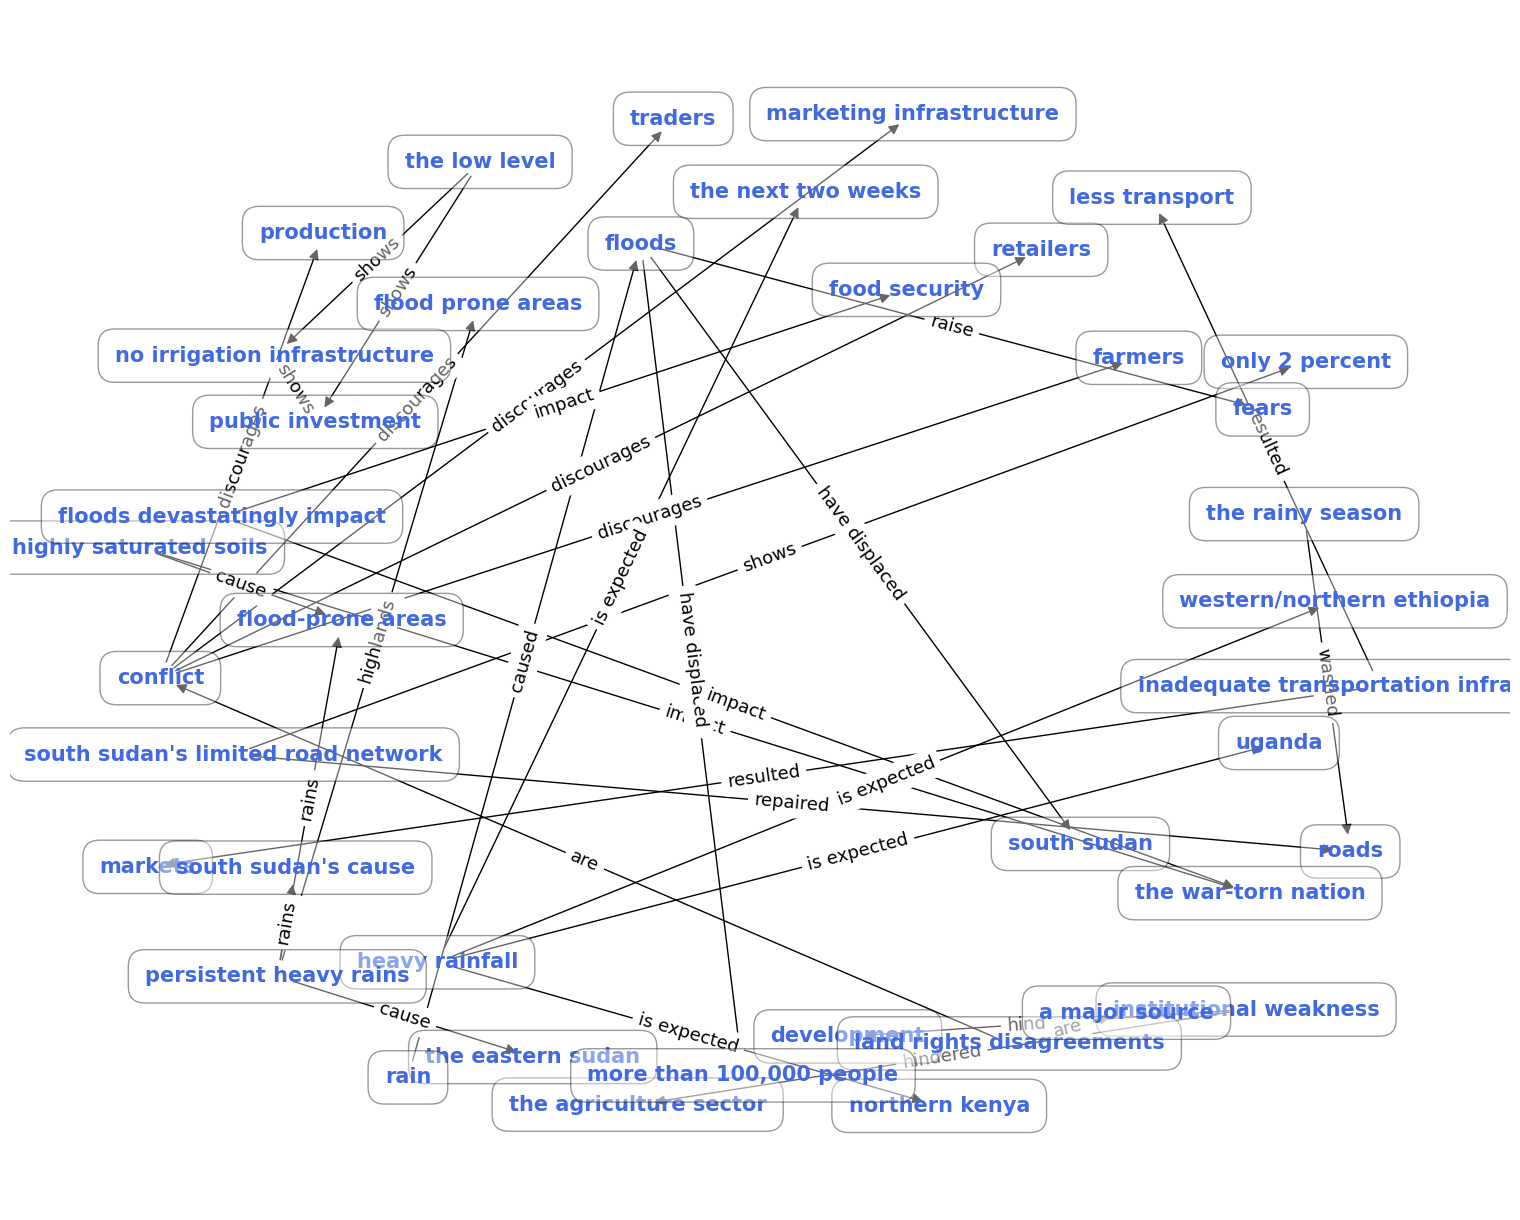

In [9]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Knowledge Graph on "Knowledge Graph.json" 

In [8]:
knowledgeGraph = nx.DiGraph()

for svo in correctTriples:
    s = str(svo[0])    
    d = str(svo[2])
    knowledgeGraph.add_node(s,id = str(s),title=str(s),x=615,y=200)
    knowledgeGraph.add_node(d,id = str(d),title=str(d),x=615,y=200)
    knowledgeGraph.add_edge(s, d, predicade=str(svo[1]))

#print(len(knowledgeGraph.nodes))
#print(len(knowledgeGraph.edges))

data = json_graph.node_link_data(knowledgeGraph)


out_file = open("./Json Graphs/Knowledge Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Create Causal Trigger Words Dictionary along with their synonyms.

In [10]:
#new

causalWords1 = ["forced","caused", "resulted", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","minimize","maximize","hindered", "displaced", "conspired","led to","activate","impel","inspire",
                "excite","quicken","rouse","stimulate","influence","determine","likely","probable","disconnected","separated"
                ,"excluded","after","as","since","trigger","oppose","fight","provides","strengthened","launched","develop"
               ,"guarantees","declared", "developed","produced","discourages","demotivated","encouraged","motivated"]

#causalWords1 = ["develop"]
synonyms1 = []
lemma_function = WordNetLemmatizer()

for cw1 in causalWords1:
    #print(cw1)
    synonyms1.append(cw1.lower())
    tokens1 = word_tokenize(cw1)
    for token1, tag1 in pos_tag(tokens1):
        lemma1 = lemma_function.lemmatize(token1)
        #print(token1,lemma1)
        
        for syn in wordnet.synsets(str(lemma1)):
            
            for l1 in syn.lemmas():
                #print(l1)
                #synonyms1.append(lemma1.lower())
                synonyms1.append(l1.name().lower())
                #print(l1)
                for syn1 in wordnet.synsets(str(l1.name())):
                    for l2 in syn1.lemmas():
                        #print(l2)
                        synonyms1.append(l2.name().lower())
            

#remove duplicates from synonyms1
synonyms = []
     
for synonym in synonyms1:
    if synonym not in synonyms:
        synonyms.append(synonym)
    
#for x in synonyms:
#    print (synonym)

print(len(synonyms))

3226


# Writing causal trigger words dictionary to text file (dictionary.txt)

In [11]:
#synonyms
output_file = open('.\dictionary.txt', 'w')

for syn in synonyms:
    #print(syn)
    output_file.write(syn + '\n')

output_file.close()

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [12]:
synonyms = []

my_file = open(".\dictionary.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [13]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates
#lem = []
#lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)
print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

23
23
institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, development)
institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, the agriculture sector)
conflict discourages farmers from expanding production. (conflict, discourages, production)
conflict discourages farmers from expanding production. (conflict, discourages, farmers)
conflict discourages traders from building marketing infrastructure. (conflict, discourages, traders)
conflict discourages traders from building marketing infrastructure. (conflict, discourages, marketing infrastructure)
conflict discourages retailers from building marketing infrastructure. (conflict, discourages, retailers)
the low level of public investment shows that no irrigation infrastructure exists. (no irrigation infrastructure, shows, public investment)
the low level of public investment shows that no irrigation infrastructure exists. (the low level

# Plot the Causal Graph.

Nodes: 29
Edges: 23
institutional weakness , {'predicade': 'hindered'} , development
institutional weakness , {'predicade': 'hindered'} , the agriculture sector
conflict , {'predicade': 'discourages'} , production
conflict , {'predicade': 'discourages'} , farmers
conflict , {'predicade': 'discourages'} , traders
conflict , {'predicade': 'discourages'} , marketing infrastructure
conflict , {'predicade': 'discourages'} , retailers
no irrigation infrastructure , {'predicade': 'shows'} , public investment
the low level , {'predicade': 'shows'} , public investment
the low level , {'predicade': 'shows'} , no irrigation infrastructure
south sudan's limited road network , {'predicade': 'shows'} , only 2 percent
inadequate transportation infrastructure , {'predicade': 'resulted'} , markets
inadequate transportation infrastructure , {'predicade': 'resulted'} , less transport
persistent heavy rains , {'predicade': 'cause'} , the eastern sudan
persistent heavy rains , {'predicade': 'cause'} , floo

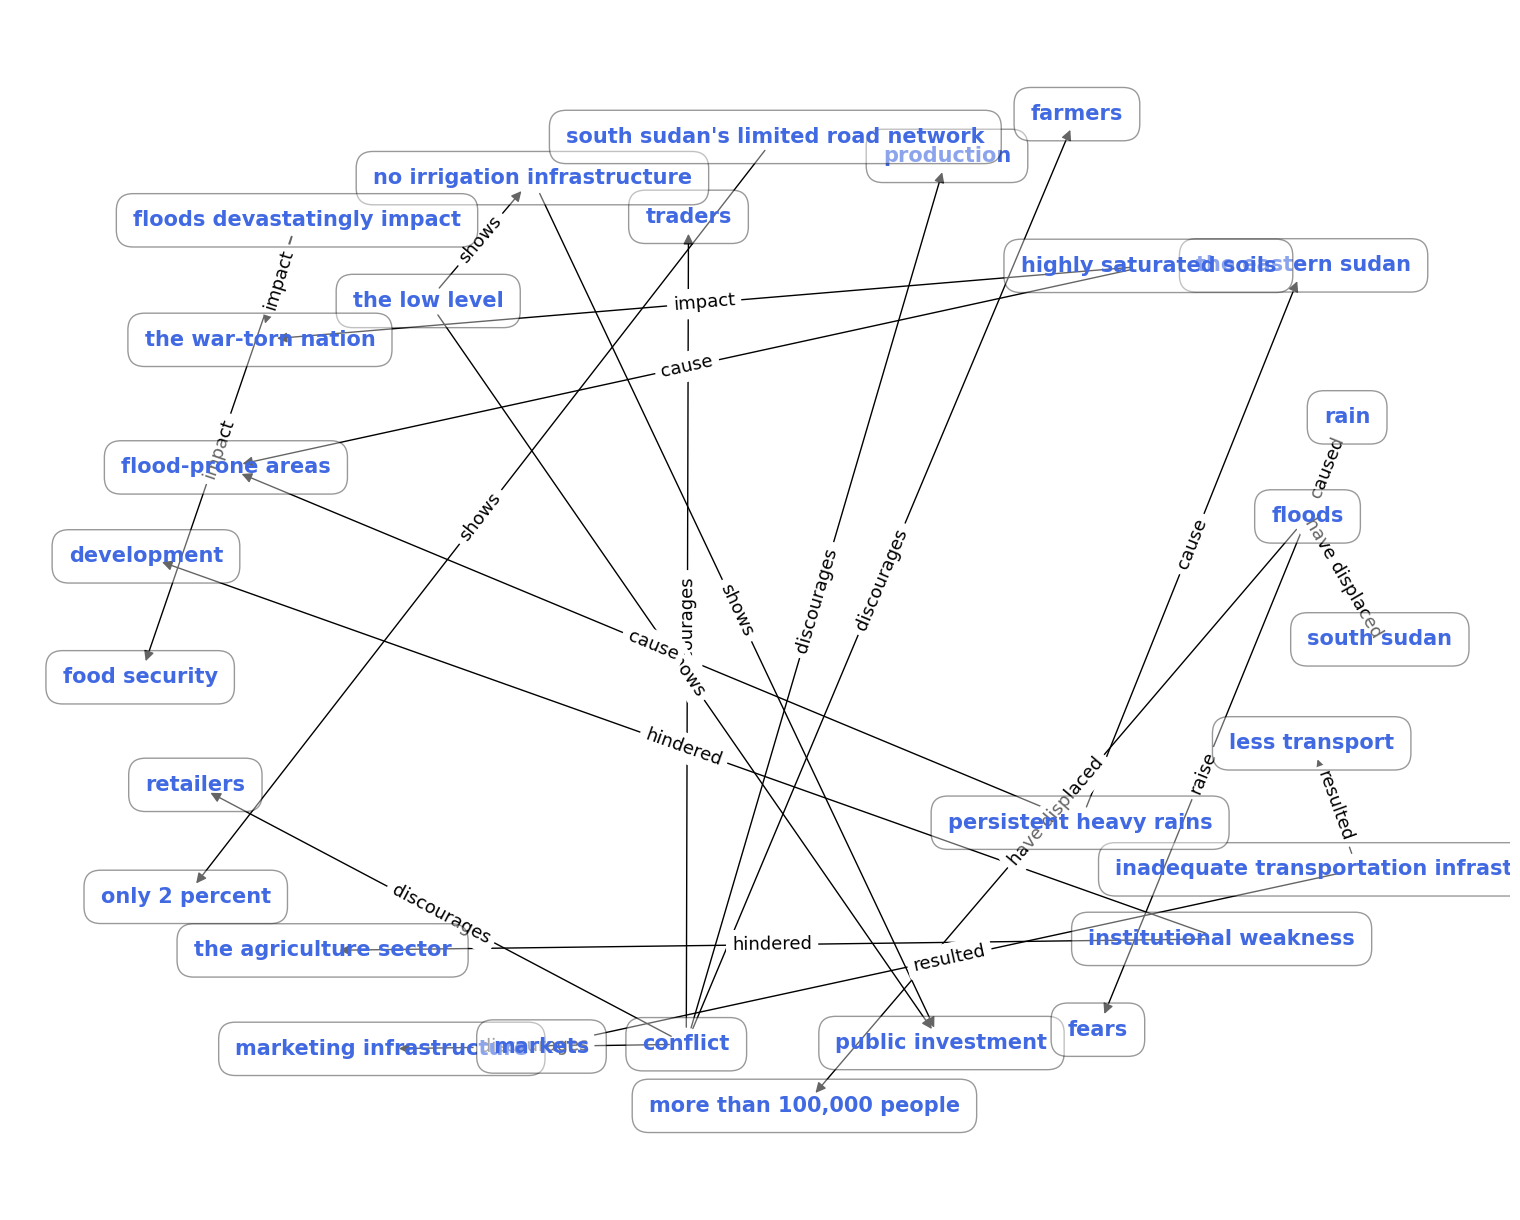

In [14]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
    dagCauseTriples.append(ce)
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
        dagCauseTriples.remove(ce)
        

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Plot the Causal Graph on using Pyvis "Causal Graph.html" file 

In [1]:
nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

NameError: name 'Network' is not defined

# Dump the Causal Graph on "Causal Graph.json" file 

In [10]:
data = json_graph.node_link_data(cg)


out_file = open("./Json Graphs/Causal Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Remove Duplicates from Causal Triples

In [13]:
#causeffect = list(dict.fromkeys(causeffect))

print("List before removing duplicates:")
print(len(causeffect))

for t in causeffect:
    print(t)
    
causalTriples = []

for ce in causeffect:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalTriples) == 0:
        #print("HEY!")
        causalTriples.append(ce)
        #print("added!")
    else:
        for ct in causalTriples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalTriples.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalTriples))

for t in causalTriples:
    print(t)

List before removing duplicates:
12
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(nuclear bomb, makes, nuclear power)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, provides, vigilance)
(vigilance, strengthened, national survival)

List after removing duplicates:
12
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(nuclear bomb, makes, nuclear power)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, provides, vi

# Remove Duplicates from causalSentences

In [14]:
#causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))
print("List before removing duplicates:")
print(len(causalSentences))

for t in causalSentences:
    print(t)
    
causalSentencesNoDup = []

for ce in causalSentences:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalSentencesNoDup) == 0:
        #print("HEY!")
        causalSentencesNoDup.append(ce)
        #print("added!")
    else:
        for ct in causalSentencesNoDup:
            #print("ct:")
            #print(ct)
            if str(ce) == str(ct):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalSentencesNoDup.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalSentencesNoDup))

for t in causalSentencesNoDup:
    print(t)

List before removing duplicates:
12
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
nuclear bomb makes nuclear power.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
pakistan must support army and aq khan.
army provides vigilance.
vigilance strengthened national survival.

List after removing duplicates:
10
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
nuclear bomb makes nuclear power.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
army provides vigilance.
vigilance strengthen

# Causal Triples' Polarity (Whole) 

### [AllenNlp] 

In [15]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
allen = []
for sent in causalTriples:
    #print(sent)
    preds = predictor1.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
for causalSentence, polarity  in zip(causalTriples, allen):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) -1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) 1
(pakistan, must never surrender, nuclear bomb) 1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1


### [Afinn]

In [16]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)

afinn = []
for sent in causalTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
for causalSentence, polarity  in zip(causalTriples, afinn):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) 1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1


### [Vader]

In [17]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in causalTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
for causalSentence, polarity  in zip(causalTriples, vader):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 0
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) 1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1


### [SentiStrength]

In [18]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

#senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
#senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')


sentiStrength = []

for sent in causalTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

for causalSentence, polarity  in zip(causalTriples, sentiStrength):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1


### Data Frame (Causal Triples Whole)

In [ ]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(causalTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

# Causal Sentences' Polarity (Whole) 

### [AllenNlp] 

In [17]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        #print(sent)
        preds = predictor1.predict(str(sent))
        #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen.append(-1)
        else:
            allen.append(1)
    return allen

#for causalSentence, polarity  in zip(causalSentences, allen):
#    print(causalSentence, polarity)

### [Afinn]

In [18]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score > 0:
            #print('positive')
            afinn.append(1)
        elif score < 0:
            #print('negative')
            afinn.append(-1)
        else:
            #print('neutral')
            afinn.append(0)
    return afinn

#for causalSentence, polarity  in zip(causalSentences, afinn):
#    print(causalSentence, polarity)

### [Vader]

In [19]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    #vader = []
    if compound >= 0.05:
        #vader.append(1)
        return 1
    elif compound <= -0.05 :
        #vader.append(-1)
        return -1
        
    elif  compound > -0.05 and compound < 0.05:
        #vader.append(0)
        return 0
    #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        res = vader_analysis(compound)
        #vaderTup.append(res)
        vader.append(res)
    return vader

#vader = Vader_sents_SentLevel(causalSents)
#vader
#for causalSentence, polarity  in zip(causalSentences, vader):
#    print(causalSentence, polarity)

### [SentiStrength]

In [20]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='binary')
        #print(result)
    
        if result[0]==1:
            #print('Positive')
            sentiStrength.append(1)
        elif result[0]==-1:
            sentiStrength.append(-1)
            #print('Negative')
        #else:
        #    print('Neutral')
    return sentiStrength

#for causalSentence, polarity  in zip(causalSentences, sentiStrength):
#    print(causalSentence, polarity)

### [SentiWordnet]

### [SentiWordNet OnlyVerbs]

### Detect Causal Sentences' Polarity (Sent Level) without duplicates

In [21]:
causalSents = causalSentencesNoDup
print(len(causalSents))

11


### Detect Causal Sentences' Polarity (Sent Level) with duplicates

### Data Frame (Causal Sentence at Sentence Level)

In [22]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

allen = Allen_sents_SentLevel(causalSents)
afinn = Afinn_sents_SentLevel(causalSents)
vader = Vader_sents_SentLevel(causalSents)
sentiStrength = Senti_sents_SentLevel(causalSents)

df2 = pd.DataFrame(list(zip(causalSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)


sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df2.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

# Causal Triples' Polarity (Token Level) 

### [AllenNlp] 

In [20]:
allen_word = []
allen_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks: 
        #print(token)
        preds = predictor1.predict(str(token))
            #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen_tuple.append(-1)
                #allen_word.append(-1)
        else:
                #allen_word.append(1)
            allen_tuple.append(1)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(causalTriples,allen_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [1, 1, -1]
(nuclear program, declared, pakistan's commitment) [-1, 1, 1]
(nuclear program, declared, pakistan's dedication) [-1, 1, 1]
(aq khan, developed, nuclear bomb) [1, 1, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 1]
(nuclear bomb, makes, nuclear power) [-1, 1, 1]
(pakistan, must never surrender, nuclear bomb) [1, 1, -1]
(pakistan, must fight, existential threats) [1, 1, -1]
(pakistan, must support, army) [1, 1, 1]
(pakistan, must support, aq khan) [1, 1, 1]
(army, provides, vigilance) [1, 1, 1]
(vigilance, strengthened, national survival) [1, 1, 1]


### [Afinn] 

In [21]:
afinn_word = []
afinn_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score > 0:
                #print('positive')
            afinn_tuple.append(1)
        elif score < 0:
                #print('negative')
            afinn_tuple.append(-1)
        else:
                #print('neutral')
            afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(causalTriples,afinn_word):
   # print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 1, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 1]
(nuclear program, declared, pakistan's dedication) [0, 0, 1]
(aq khan, developed, nuclear bomb) [0, 0, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 0]
(nuclear bomb, makes, nuclear power) [-1, 0, 0]
(pakistan, must never surrender, nuclear bomb) [0, 0, -1]
(pakistan, must fight, existential threats) [0, -1, -1]
(pakistan, must support, army) [0, 1, 0]
(pakistan, must support, aq khan) [0, 1, 0]
(army, provides, vigilance) [0, 0, 0]
(vigilance, strengthened, national survival) [0, 1, 0]


### [Vader] 

In [22]:
vader_word = []
vader_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        if compound >= 0.05:
            vader_tuple.append(1)   
        elif compound <= -0.05 :
            vader_tuple.append(-1)
        elif  compound > -0.05 and compound < 0.05:
            vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(causalTriples,vader_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 1, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 1]
(nuclear program, declared, pakistan's dedication) [0, 0, 0]
(aq khan, developed, nuclear bomb) [0, 0, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 0]
(nuclear bomb, makes, nuclear power) [-1, 0, 0]
(pakistan, must never surrender, nuclear bomb) [0, 0, -1]
(pakistan, must fight, existential threats) [0, -1, -1]
(pakistan, must support, army) [0, 1, 0]
(pakistan, must support, aq khan) [0, 1, 0]
(army, provides, vigilance) [0, 0, 0]
(vigilance, strengthened, national survival) [0, 1, 0]


### [SentiStrength] 

In [23]:
senti_word = []
senti_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks:
        #print(token)
        result = senti.getSentiment(str(token), score='binary')
            #print(result)
        if result[0]==1:
                #print('Positive')
            senti_tuple.append(1)
        elif result[0]==-1:
                #print('Negative')
            senti_tuple.append(-1)
        else:
                #print('Neutral')
            senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(causalTriples,senti_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [1, 1, 1]
(nuclear program, declared, pakistan's commitment) [1, 1, 1]
(nuclear program, declared, pakistan's dedication) [1, 1, 1]
(aq khan, developed, nuclear bomb) [1, 1, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 1]
(nuclear bomb, makes, nuclear power) [-1, 1, 1]
(pakistan, must never surrender, nuclear bomb) [1, 1, -1]
(pakistan, must fight, existential threats) [1, -1, -1]
(pakistan, must support, army) [1, 1, 1]
(pakistan, must support, aq khan) [1, 1, 1]
(army, provides, vigilance) [1, 1, 1]
(vigilance, strengthened, national survival) [1, 1, 1]


### Data Frame (Causal Triples Token Level)

In [24]:
sum_list = []
sum_tup = []
limit= len(causalTriples)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []


def dataframe_WordLevel(i):
    df = pd.DataFrame([causalTriples[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],triplesWeight_TokenLevel[i],triplePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

0                1                   2
Tokens           (zulfikar, ali, bhutto)       (launched)  (nuclear, program)
AllenNlp                               1                1                  -1
Afinn                                  0                1                   0
Vader                                  0                1                   0
SentiStrength                          1                1                   1
Token Weight                           2                4                   0
Token Polarity             Mild Positive  Strong Positive             Neutral
Triple Weight                        2.0             None                None
Triple Polarity            Mild Positive             None                None

0              1                           2
Tokens           (nuclear, program)     (declared)  (pakistan, 's, commitment)
AllenNlp                         -1              1                           1
Afinn                             0              0                           1
Vader                             0              0                           1
SentiStrength                     1              1                           1
Token Weight                      0              2                           4
Token Polarity              Neutral  Mild Positive             Strong Positive
Triple Weight                   2.0           None                        None
Triple Polarity       Mild Positive           None                        None

0              1                           2
Tokens           (nuclear, program)     (declared)  (pakistan, 's, dedication)
AllenNlp                         -1              1                           1
Afinn                             0              0                           1
Vader                             0              0                           0
SentiStrength                     1              1                           1
Token Weight                      0              2                           3
Token Polarity              Neutral  Mild Positive           Moderate Positive
Triple Weight                  1.67           None                        None
Triple Polarity       Mild Positive           None                        None

0              1                2
Tokens              (aq, khan)    (developed)  (nuclear, bomb)
AllenNlp                     1              1               -1
Afinn                        0              0               -1
Vader                        0              0               -1
SentiStrength                1              1               -1
Token Weight                 2              2               -4
Token Polarity   Mild Positive  Mild Positive  Strong Negative
Triple Weight              0.0           None             None
Triple Polarity        Neutral           None             None

0                1              2
Tokens           (nuclear, bomb)   (strengthened)     (pakistan)
AllenNlp                      -1                1              1
Afinn                         -1                1              0
Vader                         -1                1              0
SentiStrength                 -1                1              1
Token Weight                  -4                4              2
Token Polarity   Strong Negative  Strong Positive  Mild Positive
Triple Weight               0.67             None           None
Triple Polarity    Weak Positive             None           None

0              1                 2
Tokens           (nuclear, bomb)        (makes)  (nuclear, power)
AllenNlp                      -1              1                 1
Afinn                         -1              0                 0
Vader                         -1              0                 0
SentiStrength                 -1              1                 1
Token Weight                  -4              2                 2
Token Polarity   Strong Negative  Mild Positive     Mild Positive
Triple Weight                0.0           None              None
Triple Polarity          Neutral           None              None

0                         1                2
Tokens              (pakistan)  (must, never, surrender)  (nuclear, bomb)
AllenNlp                     1                         1               -1
Afinn                        0                         0               -1
Vader                        0                         0               -1
SentiStrength                1                         1               -1
Token Weight                 2                         2               -4
Token Polarity   Mild Positive             Mild Positive  Strong Negative
Triple Weight              0.0                      None             None
Triple Polarity        Neutral                      None             None

0              1                       2
Tokens              (pakistan)  (must, fight)  (existential, threats)
AllenNlp                     1              1                      -1
Afinn                        0             -1                      -1
Vader                        0             -1                      -1
SentiStrength                1             -1                      -1
Token Weight                 2             -2                      -4
Token Polarity   Mild Positive  Mild Negative         Strong Negative
Triple Weight            -1.33           None                    None
Triple Polarity  Mild Negative           None                    None

0                1              2
Tokens                  (pakistan)  (must, support)         (army)
AllenNlp                         1                1              1
Afinn                            0                1              0
Vader                            0                1              0
SentiStrength                    1                1              1
Token Weight                     2                4              2
Token Polarity       Mild Positive  Strong Positive  Mild Positive
Triple Weight                 2.67             None           None
Triple Polarity  Moderate Positive             None           None

0                1              2
Tokens                  (pakistan)  (must, support)     (aq, khan)
AllenNlp                         1                1              1
Afinn                            0                1              0
Vader                            0                1              0
SentiStrength                    1                1              1
Token Weight                     2                4              2
Token Polarity       Mild Positive  Strong Positive  Mild Positive
Triple Weight                 2.67             None           None
Triple Polarity  Moderate Positive             None           None

0              1              2
Tokens                  (army)     (provides)    (vigilance)
AllenNlp                     1              1              1
Afinn                        0              0              0
Vader                        0              0              0
SentiStrength                1              1              1
Token Weight                 2              2              2
Token Polarity   Mild Positive  Mild Positive  Mild Positive
Triple Weight              2.0           None           None
Triple Polarity  Mild Positive           None           None

0                1                     2
Tokens                 (vigilance)   (strengthened)  (national, survival)
AllenNlp                         1                1                     1
Afinn                            0                1                     0
Vader                            0                1                     0
SentiStrength                    1                1                     1
Token Weight                     2                4                     2
Token Polarity       Mild Positive  Strong Positive         Mild Positive
Triple Weight                 2.67             None                  None
Triple Polarity  Moderate Positive             None                  None

# Causal Sentences' Polarity (Token Level) 

### Generating list of tokens without stop words and punctuation marks.

In [28]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    token_list = []
   
    for sent in causalSentences:
        token_tuple = []
        for token in sent:
            if str(token) not in marks:
                if str(token) not in stopwords.words():
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list
        
#print(len(token_list))
#print(token_list)

### [AllenNlp] 

In [29]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks: 
                #print(token)
            preds = predictor1.predict(str(token))
                #print(preds['label'][0])
            label = preds['label'][0]
            if label is '0':
                allen_tuple.append(-1)
                    #allen_word.append(-1)
            else:
                    #allen_word.append(1)
                allen_tuple.append(1)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

#for a in allen_word:
#    print(len(a))
#    print(a)

### [Afinn] 

In [30]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score > 0:
                    #print('positive')
                afinn_tuple.append(1)
            elif score < 0:
                    #print('negative')
                afinn_tuple.append(-1)
            else:
                    #print('neutral')
                afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

#for a in afinn_word:
#    print(len(a))
#    print(a)

### [Vader] 

In [31]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            if compound >= 0.05:
                vader_tuple.append(1)   
            elif compound <= -0.05 :
                vader_tuple.append(-1)
            elif  compound > -0.05 and compound < 0.05:
                vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

#for a in vader_word:
#    print(len(a))
#    print(a)

### [SentiStrength] 

In [32]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='binary')
                #print(result)
            if result[0]==1:
                    #print('Positive')
                senti_tuple.append(1)
            elif result[0]==-1:
                    #print('Negative')
                senti_tuple.append(-1)
            else:
                    #print('Neutral')
                senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word
    
#for a in senti_word:
#    print(len(a))
#    print(a)

### Data Frame (Causal Sentences Word Level)

In [33]:
token_list = GenerateTokens(causalSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(causalSents)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []


def dataframe_WordLevel(i):
    df = pd.DataFrame([token_list[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],sentsWeight_TokenLevel[i],SentencePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

0                1         2              3  \
Tokens             institutional         weakness  hindered    development   
AllenNlp                       1               -1        -1              1   
Afinn                          0               -1         0              0   
Vader                          0               -1         0              0   
SentiStrength                  1               -1         1              1   
Token Weight                   2               -4         0              2   
Token Polarity     Mild Positive  Strong Negative   Neutral  Mild Positive   
Sentence Weight             0.67             None      None           None   
Sentence Polarity  Weak Positive             None      None           None   

                               4              5  
Tokens               agriculture         sector  
AllenNlp                       1              1  
Afinn                          0              0  
Vader                          0              0  
SentiStrength                  1              1  
Token Weight                   2              2  
Token Polarity     Mild Positive  Mild Positive  
Sentence Weight             None           None  
Sentence Polarity           None           None

0              1              2  \
Tokens                           low          level         public   
AllenNlp                          -1              1              1   
Afinn                              0              0              0   
Vader                             -1              0              0   
SentiStrength                     -1              1              1   
Token Weight                      -3              2              2   
Token Polarity     Moderate Negative  Mild Positive  Mild Positive   
Sentence Weight                 1.12           None           None   
Sentence Polarity      Mild Positive           None           None   

                               3              4           5               6  \
Tokens                investment          shows  irrigation  infrastructure   
AllenNlp                       1              1          -1               1   
Afinn                          0              0           0               0   
Vader                          0              0           0               0   
SentiStrength                  1              1           1               1   
Token Weight                   2              2           0               2   
Token Polarity     Mild Positive  Mild Positive     Neutral   Mild Positive   
Sentence Weight             None           None        None            None   
Sentence Polarity           None           None        None            None   

                               7  
Tokens                    exists  
AllenNlp                       1  
Afinn                          0  
Vader                          0  
SentiStrength                  1  
Token Weight                   2  
Token Polarity     Mild Positive  
Sentence Weight             None  
Sentence Polarity           None

0              1              2  \
Tokens                           low          level         public   
AllenNlp                          -1              1              1   
Afinn                              0              0              0   
Vader                             -1              0              0   
SentiStrength                     -1              1              1   
Token Weight                      -3              2              2   
Token Polarity     Moderate Negative  Mild Positive  Mild Positive   
Sentence Weight                 0.85           None           None   
Sentence Polarity      Weak Positive           None           None   

                               3              4              5              6  \
Tokens                investment          shows              2        percent   
AllenNlp                       1              1              1              1   
Afinn                          0              0              0              0   
Vader                          0              0              0              0   
SentiStrength                  1              1              1              1   
Token Weight                   2              2              2              2   
Token Polarity     Mild Positive  Mild Positive  Mild Positive  Mild Positive   
Sentence Weight             None           None           None           None   
Sentence Polarity           None           None           None           None   

                         7        8              9       10             11  \
Tokens               south    sudan        limited     road        network   
AllenNlp                -1       -1             -1       -1              1   
Afinn                    0        0             -1        0              0   
Vader                    0        0             -1        0              0   
SentiStrength            1        1              1        1              1   
Token Weight             0        0             -2        0              2   
Token Polarity     Neutral  Neutral  Mild Negative  Neutral  Mild Positive   
Sentence Weight       None     None           None     None           None   
Sentence Polarity     None     None           None     None           None   

                              12  
Tokens                     paved  
AllenNlp                       1  
Afinn                          0  
Vader                          0  
SentiStrength                  1  
Token Weight                   2  
Token Polarity     Mild Positive  
Sentence Weight             None  
Sentence Polarity           None

0               1               2  \
Tokens                  inadequate  transportation  infrastructure   
AllenNlp                        -1               1               1   
Afinn                           -1               0               0   
Vader                           -1               0               0   
SentiStrength                   -1               1               1   
Token Weight                    -4               2               2   
Token Polarity     Strong Negative   Mild Positive   Mild Positive   
Sentence Weight               0.86            None            None   
Sentence Polarity    Weak Positive            None            None   

                               3        4              5              6  
Tokens                  resulted     less      transport        markets  
AllenNlp                       1       -1              1              1  
Afinn                          0        0              0              0  
Vader                          0        0              0              0  
SentiStrength                  1        1              1              1  
Token Weight                   2        0              2              2  
Token Polarity     Mild Positive  Neutral  Mild Positive  Mild Positive  
Sentence Weight             None     None           None           None  
Sentence Polarity           None     None           None           None

0        1        2              3  \
Tokens                persistent    heavy    rains      ethiopian   
AllenNlp                       1       -1       -1              1   
Afinn                          0        0        0              0   
Vader                          0        0        0              0   
SentiStrength                  1        1        1              1   
Token Weight                   2        0        0              2   
Token Polarity     Mild Positive  Neutral  Neutral  Mild Positive   
Sentence Weight                1     None     None           None   
Sentence Polarity  Weak Positive     None     None           None   

                               4              5         6        7        8  \
Tokens                 highlands          cause  flooding    flood    prone   
AllenNlp                       1              1        -1       -1       -1   
Afinn                          0              0         0        0        0   
Vader                          0              0         0        0        0   
SentiStrength                  1              1         1        1        1   
Token Weight                   2              2         0        0        0   
Token Polarity     Mild Positive  Mild Positive   Neutral  Neutral  Neutral   
Sentence Weight             None           None      None     None     None   
Sentence Polarity           None           None      None     None     None   

                               9  
Tokens                     areas  
AllenNlp                       1  
Afinn                          0  
Vader                          0  
SentiStrength                  1  
Token Weight                   2  
Token Polarity     Mild Positive  
Sentence Weight             None  
Sentence Polarity           None

0        1        2        3        4  \
Tokens                persistent    heavy    rains    south    sudan   
AllenNlp                       1       -1       -1       -1       -1   
Afinn                          0        0        0        0        0   
Vader                          0        0        0        0        0   
SentiStrength                  1        1        1        1        1   
Token Weight                   2        0        0        0        0   
Token Polarity     Mild Positive  Neutral  Neutral  Neutral  Neutral   
Sentence Weight              0.6     None     None     None     None   
Sentence Polarity  Weak Positive     None     None     None     None   

                               5         6        7        8              9  
Tokens                     cause  flooding    flood    prone          areas  
AllenNlp                       1        -1       -1       -1              1  
Afinn                          0         0        0        0              0  
Vader                          0         0        0        0              0  
SentiStrength                  1         1        1        1              1  
Token Weight                   2         0        0        0              2  
Token Polarity     Mild Positive   Neutral  Neutral  Neutral  Mild Positive  
Sentence Weight             None      None     None     None           None  
Sentence Polarity           None      None     None     None           None

0          1        2              3         4  \
Tokens                    highly  saturated    soils          cause  flooding   
AllenNlp                       1         -1       -1              1        -1   
Afinn                          0          0        0              0         0   
Vader                          0          0        0              0         0   
SentiStrength                  1          1        1              1         1   
Token Weight                   2          0        0              2         0   
Token Polarity     Mild Positive    Neutral  Neutral  Mild Positive   Neutral   
Sentence Weight             0.75       None     None           None      None   
Sentence Polarity  Weak Positive       None     None           None      None   

                         5        6              7  
Tokens               flood    prone          areas  
AllenNlp                -1       -1              1  
Afinn                    0        0              0  
Vader                    0        0              0  
SentiStrength            1        1              1  
Token Weight             0        0              2  
Token Polarity     Neutral  Neutral  Mild Positive  
Sentence Weight       None     None           None  
Sentence Polarity     None     None           None

0              1              2
Tokens                      rain         caused         floods
AllenNlp                      -1              1              1
Afinn                          0              0              0
Vader                          0              0              0
SentiStrength                  1              1              1
Token Weight                   0              2              2
Token Polarity           Neutral  Mild Positive  Mild Positive
Sentence Weight             1.33           None           None
Sentence Polarity  Mild Positive           None           None

0              1              2              3  \
Tokens                    floods      displaced        100,000         people   
AllenNlp                       1             -1              1              1   
Afinn                          0              0              0              0   
Vader                          0              0              0              0   
SentiStrength                  1             -1              1              1   
Token Weight                   2             -2              2              2   
Token Polarity     Mild Positive  Mild Negative  Mild Positive  Mild Positive   
Sentence Weight             0.67           None           None           None   
Sentence Polarity  Weak Positive           None           None           None   

                         4        5  
Tokens               south    sudan  
AllenNlp                -1       -1  
Afinn                    0        0  
Vader                    0        0  
SentiStrength            1        1  
Token Weight             0        0  
Token Polarity     Neutral  Neutral  
Sentence Weight       None     None  
Sentence Polarity     None     None

0              1                  2
Tokens                    floods          raise              fears
AllenNlp                       1              1                 -1
Afinn                          0              0                  0
Vader                          0              0                 -1
SentiStrength                  1              1                 -1
Token Weight                   2              2                 -3
Token Polarity     Mild Positive  Mild Positive  Moderate Negative
Sentence Weight             0.33           None               None
Sentence Polarity  Weak Positive           None               None

0                  1              2  \
Tokens                    floods      devastatingly         impact   
AllenNlp                       1                 -1              1   
Afinn                          0                  0              0   
Vader                          0                 -1              0   
SentiStrength                  1                 -1              1   
Token Weight                   2                 -3              2   
Token Polarity     Mild Positive  Moderate Negative  Mild Positive   
Sentence Weight             0.86               None           None   
Sentence Polarity  Weak Positive               None           None   

                               3                  4        5        6  
Tokens                      food           security    south    sudan  
AllenNlp                       1                  1       -1       -1  
Afinn                          0                  0        0        0  
Vader                          0                  1        0        0  
SentiStrength                  1                  1        1        1  
Token Weight                   2                  3        0        0  
Token Polarity     Mild Positive  Moderate Positive  Neutral  Neutral  
Sentence Weight             None               None     None     None  
Sentence Polarity           None               None     None     None

# Overall Polarity of Sents and Triples by all Four Methods

### Follow the following instructions (steps) before executing the cell given below
#### Step1- Execute cell for setting causalSents to causalSentences (with duplicates). 
#### Step2- Execute cell for computing sentences' polarity at sentence level. 
#### Step3- Execute cell for computing sentences' polarity at token level.
#### Step4- Execute the below cell.

In [ ]:
totalWeight_AllMethods = []

limit= len(causalSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+triplesWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/4,2)
        sum_tup.append(res)
    totalWeight_AllMethods.append(sum_tup)
    
totalPlarity_AllMethods = DetectPolarity(totalWeight_AllMethods)

df_AllMethods = pd.DataFrame(list(zip(causalSents, causalTriples, sentsWeight_sentLevel, triplesWeight_sentLevel, sentsWeight_TokenLevel, triplesWeight_TokenLevel, totalWeight_AllMethods,totalPlarity_AllMethods)), 
                             columns =['Causal Sentence', 'Causal Triple', 'Method1 (Sent_SentLevel)', 'Method2 (Trip_SentLevel)','Method3 (Sent_TokLevel)','Method4 (Trip_TokLevel)','Total Weight','Overall Polarity'])

df_AllMethods.style

# Overall Polarity of Triples at two (sentence and token) levels

In [34]:
totalTriplesWeight_AllLevels = []

limit= len(causalTriples)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(triplesWeight_sentLevel[i])):
        res = triplesWeight_sentLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalTriplesWeight_AllLevels.append(sum_tup)
    
totalTripsPlarity_AllLevels = DetectPolarity(totalTriplesWeight_AllLevels)

df_TripAllLevels = pd.DataFrame(list(zip(causalTriples, triplesWeight_sentLevel, triplesWeight_TokenLevel, totalTriplesWeight_AllLevels, totalTripsPlarity_AllLevels)), 
                             columns =['Causal Triple', 'Weight (Trip_SentLevel)','Weight (Trip_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_TripAllLevels.style

# Overall Polarity of Sentences at two (sentence and token) Levels

In [35]:
totalSentsWeight_AllLevels = []

limit= len(causalSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalSentsWeight_AllLevels.append(sum_tup)
    
totalSentsPolarity_AllLevels = DetectPolarity(totalSentsWeight_AllLevels)

df_SentsAllLevels = pd.DataFrame(list(zip(causalSents, sentsWeight_sentLevel, sentsWeight_TokenLevel, totalSentsWeight_AllLevels, totalSentsPolarity_AllLevels)), 
                             columns =['Causal Sentence', 'Weight (Sent_SentLevel)','Weight (Sent_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_SentsAllLevels.style

# Plot the Polarized/Modified Causal Graph.